# 預處理

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.utils import np_utils
from keras.datasets import cifar10

Using TensorFlow backend.


In [2]:
(x_img_train, y_label_train), (x_img_test, y_label_test) = cifar10.load_data()

In [3]:
label_dict = {0: 'airplane',
              1: 'automobile',
              2: 'bird',
              3: 'cat',
              4: 'deer',
              5: 'dog',
              6: 'frog',
              7: 'horse',
              8: 'ship',
              9: 'truck',
}

In [38]:
def plot_images_labels_prediction(images, labels, prediction, idx, num):
    fig = plt.gcf()
    fig.set_size_inches(15, 20)
    for i in range(0, num):
        ax = plt.subplot(10, 10, 1 + i)
        ax.imshow(images[idx], cmap = 'binary')
        title = str(i) + ', ' + label_dict[labels[i][0]]
        if len(prediction) > 0:
            title = title + '\n' + 'prediction: \n' + label_dict[prediction[i]]
        ax.set_title(title, fontsize = 10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx += 1
    plt.show()

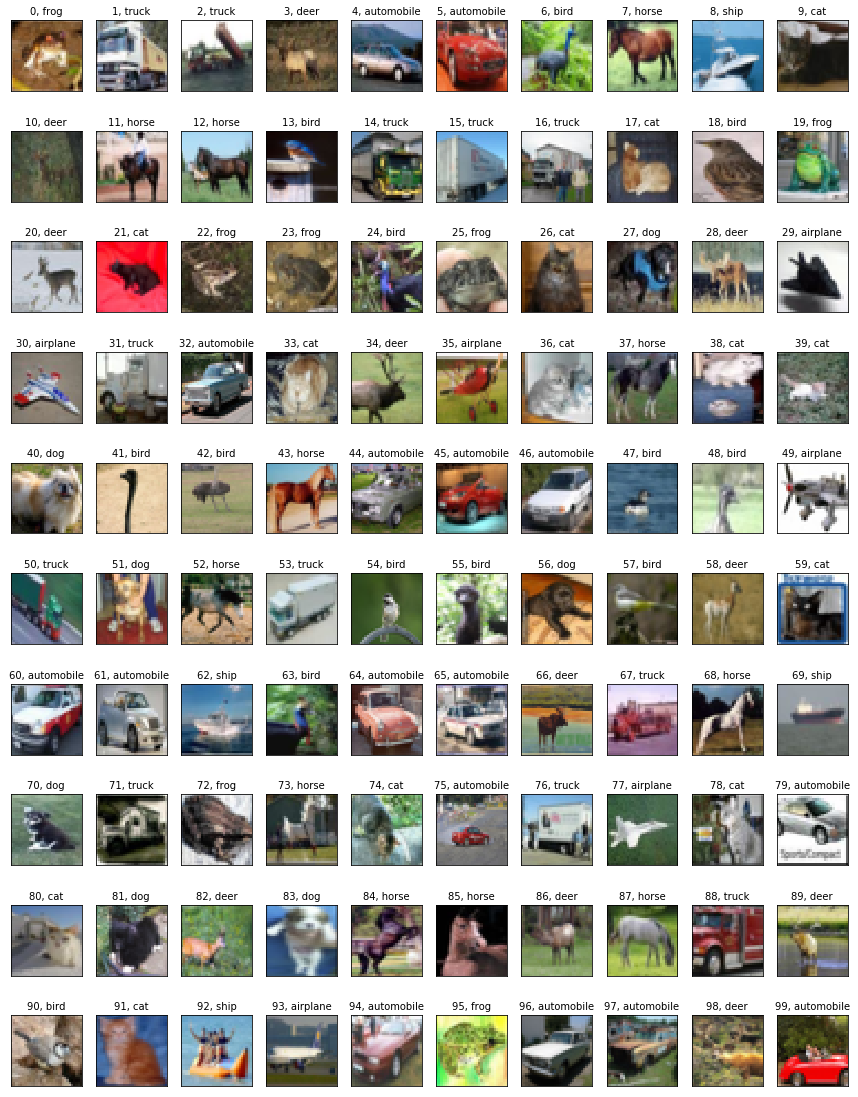

In [39]:
plot_images_labels_prediction(x_img_train, y_label_train, [], 0, 100)

In [6]:
x_img_train_normalize = x_img_train.astype('float') / 255
x_img_test_normalize = x_img_test.astype('float') / 255

In [7]:
print(x_img_train_normalize.shape)
print(x_img_test_normalize.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [8]:
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [9]:
print(y_label_train_OneHot.shape)
print(y_label_test_OneHot.shape)

(50000, 10)
(10000, 10)


# 建模

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [11]:
model = Sequential()

### 卷積層1

In [12]:
model.add(Conv2D(
    filters = 32,
    kernel_size = (3, 3),
    input_shape = (32, 32, 3),
    activation = 'relu',
    padding = 'same'
))

In [13]:
model.add(Dropout(rate = 0.25))

### 池化層1

In [14]:
model.add(MaxPooling2D(pool_size = (2, 2)))

### 卷積層2

In [15]:
model.add(Conv2D(
    filters = 64,
    kernel_size = (3, 3),
    activation = 'relu',
    padding = 'same',
))

In [16]:
model.add(Dropout(rate = 0.25))

### 池化層2

In [17]:
model.add(MaxPooling2D(pool_size = (2, 2)))

### 平坦層

In [18]:
model.add(Flatten())

In [19]:
model.add(Dropout(rate = 0.25))

### 隱藏層

In [20]:
model.add(Dense(1024, activation = 'relu'))

In [21]:
model.add(Dropout(rate = 0.25))

### 輸出層

In [22]:
model.add(Dense(10, activation = 'relu'))

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

# 訓練

In [24]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy'],    
)

In [26]:
train_history = model.fit(
    x_img_train_normalize,
    y_label_train_OneHot,
    validation_split = 0.2,
    epochs = 10,
    batch_size = 128,
    verbose = 1,
)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 239s 6ms/step - loss: 3.9865 - acc: 0.1871 - val_loss: 3.3718 - val_acc: 0.2225
Epoch 2/10
40000/40000 [==============================] - 257s 6ms/step - loss: 3.3757 - acc: 0.2351 - val_loss: 3.2391 - val_acc: 0.2995
Epoch 3/10
40000/40000 [==============================] - 227s 6ms/step - loss: 3.2808 - acc: 0.3066 - val_loss: 3.1203 - val_acc: 0.3554
Epoch 4/10
40000/40000 [==============================] - 176s 4ms/step - loss: 3.4183 - acc: 0.2438 - val_loss: 3.1818 - val_acc: 0.3492
Epoch 5/10
40000/40000 [==============================] - 171s 4ms/step - loss: 3.2557 - acc: 0.3286 - val_loss: 3.2372 - val_acc: 0.3185
Epoch 6/10
40000/40000 [==============================] - 167s 4ms/step - loss: 3.2592 - acc: 0.3136 - val_loss: 3.1137 - val_acc: 0.3591
Epoch 7/10
40000/40000 [==============================] - 168s 4ms/step - loss: 3.3585 - acc: 0.2720 - val_loss: 3.2149 - 

In [27]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])
    plt.show()

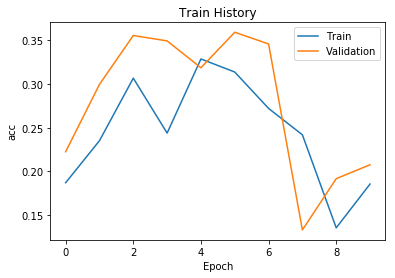

In [28]:
show_train_history(train_history, 'acc', 'val_acc')

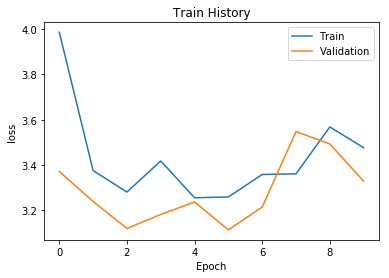

In [29]:
show_train_history(train_history, 'loss', 'val_loss')

In [31]:
scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot, verbose = 0)

In [32]:
scores

[3.358103561401367, 0.2057]

# 預測

In [33]:
prediction = model.predict_classes(x_img_test_normalize)

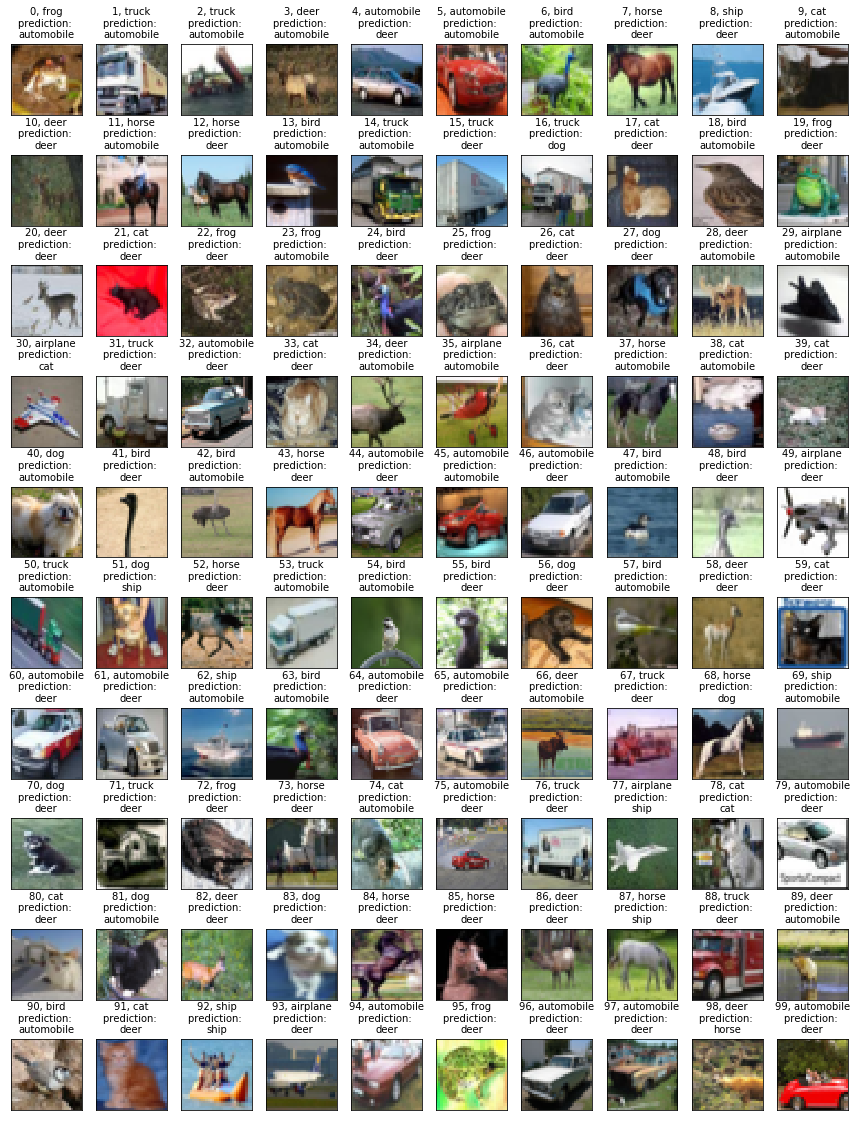

In [40]:
plot_images_labels_prediction(x_img_train, y_label_train, prediction, 0, 100)

In [44]:
Predicted_Probability = model.predict(x_img_test_normalize)

In [89]:
def show_Predict_Probability(y, prediction, x_img, Predicted_Probability, i):
    print('label: ', label_dict[y[i][0]], '\nprediction: ', label_dict[prediction[i]])
    plt.figure(figsize = (2, 2))
    plt.imshow(np.reshape(x_img_test[i], (32, 32, 3)))
    plt.show()
    for j in range(10):
        print(label_dict[j] + ': %1.9f' % (Predict_Probability[i][j]))

label:  airplane 
prediction:  automobile


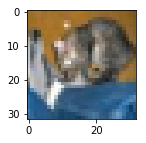

airplane: 147.148132324
automobile: 200.279724121
bird: 169.646209717
cat: 165.399642944
deer: 185.295959473
dog: 159.183242798
frog: 0.000000000
horse: 85.842826843
ship: 187.092437744
truck: 142.545028687


In [91]:
show_Predict_Probability(y_label_test_OneHot, prediction, x_img_test, Predict_Probability, 0)